# Bank customer churn prediction: MVP


In this project, the overall goal is to predict the churn of bank customers. From a business perspective, this is very relevant for the effort to retain customers with the ultimate end goal of increasing profitability.

Here in this notebook, a minimal viable product (MVP) is set up to investigate some models and generate a baseline to compare further modeling efforts to.

Customer churn is defined as the percentage of customers that stopped using a company's product or service offering in a defined time frame. One might consider that customer churn is not so important as long as more new customers are acquired than lost to the company. This is fogetting entirely the cost of acquiring new customers. Bringing in new customers is a lot less profitable than retaining customers. In financial services, for example, a 5% increase in customer retention produces more than a 25% increase in profit (http://www2.bain.com/Images/BB_Prescription_cutting_costs.pdf). The reason for that is because returning customers spend on average more than already existing customers. In online services, a loyal customer spends on average 2/3 more than a new one (http://www2.bain.com/Images/Value_online_customer_loyalty_you_capture.pdf). At the same time there is a cost associated with acquiring new customers, which decreases when less new customers have to be acquired. Keeping existing customers thus allows for a reallocation of funds away from the need of growing by acquiring new customers. 

Customer churn can be reduced by pooling resources into keeping the most profitable customers, instead of focusing on keeping overall customer numbers (even unprofitable ones). Another option would be to find out why and when customers are leaving, thus targeting in a customer lifetime this specific point and put effort into avoiding churn. In either case, the customer churn has to be thoroughly analyzed, which is what this small example project is designed to deliver.

## Outline

This churn prediction project follows this outline:

1. Dataset description
2. Descriptive visualizations using Tableau
3. Data extraction, transforming, and loading (ETL)
4. **Analysis of the dataset**
    - Feature Engineering
5. Visualization of the insights

In this part of the project, stage 4 is covered. Stages 1 and 2 can be found here: http://heikokromer.com/index.php/2020/01/10/bank-customer-churn-prediction-identifying-the-question/'. 


Stage 3 can be found here: https://kyso.io/heiko/bank-customer-churn-prediction-etl


## Feature Engineering

In this part, raw features are going to be transformed to extract more information from them. This will be done using strategies such as:

1. Encode binary categorical features with labels (label encoder)
2. Encode multicategorical features using dummies
3. Group numerical column using clustering techniques

Steps 1 and 2 have already been covered in the previous part. The function that took care of the dummy encoding was:
```python
    def get_dummies(self, df, colname):
        """
        Does one hot encoding on the dataframe df on column colname. Returns the dataframe.
        """
        df_dummy = pd.get_dummies(df[colname], prefix=colname)  # dummy encoding
        df = pd.concat([df, df_dummy], axis=1)  # combine the dfs
        df = df.drop(colname, axis=1) # remove the original column

        return df
```

### 3. Group numerical column using clustering techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

class Model_002():
    """ Class for the Analysis part that contains all the methods"""
    def __init__(self):
        self.save_path_prepared = '../02.Prepared_data/'
        
    def load_data(self, fname):
        """
        Reads and returns the dataset after the ETL process.
        """
        data = pd.read_csv(f"{self.save_path_prepared}/{fname}", index_col=0)
        
        return data
    

In [2]:
FNAME = '2020-01-26.One_hot_encoded.csv'
data = Model_002().load_data(FNAME)

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


Columns that need clustering are `CreditScore`, `Age`, `Tenure`, and `Balance`. From prior analysis it was clear that the column `EstimatedSalary` has problems, i.e. a uniform distribution of values which the bank computed with an unknown formula. First, the dataset must be scaled, both MinMaxScaler and StandardScaler shall be tested.

In [71]:
df = data[['CreditScore', 'Exited']]
km = KMeans(n_clusters=3)
km = km.fit(df)
y_km = km.predict(df)
df['y_km'] = y_km
df['y_km'].value_counts()

0    4488
1    2821
2    2691
Name: y_km, dtype: int64

In [72]:
v = ss.fit_transform(data['CreditScore'].values.reshape(-1,1))
df['sc'] = v
df

,CreditScore,Exited,y_km,sc
0,619,1,0,-0.326221
1,608,0,0,-0.440036
2,502,1,2,-1.536794
3,699,0,0,0.501521
4,850,0,1,2.063884
...,...,...,...,...
9995,771,0,1,1.246488
9996,516,0,2,-1.391939
9997,709,1,1,0.604988
9998,772,1,1,1.256835


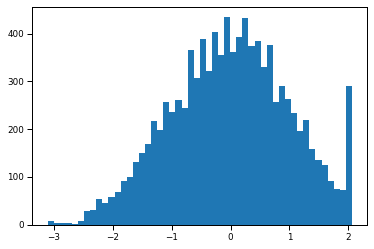

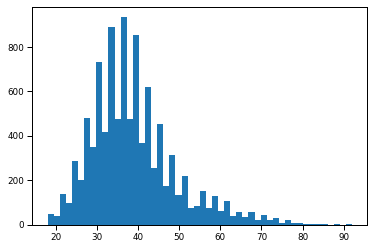

In [73]:

plt.hist(v, bins=50)
plt.show()
plt.hist(data['Age'].values, bins=50)
plt.show()

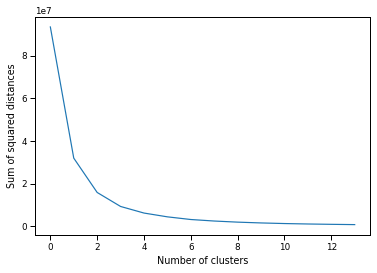

In [74]:
Sum_of_squared_distances = []
df = data[['CreditScore', 'Exited']]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(Sum_of_squared_distances)
plt.ylabel('Sum of squared distances')
plt.xlabel('Number of clusters')
plt.show()

1        1
3        1
4        2
6        7
8        4
        ..
9993     7
9994     2
9995     5
9996    10
9999     4
Name: Tenure, Length: 7963, dtype: int64

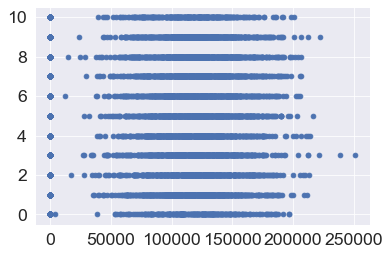

In [103]:
ten = data['Tenure']
age = data['Balance']
plt.scatter(age, ten)
plt.show()

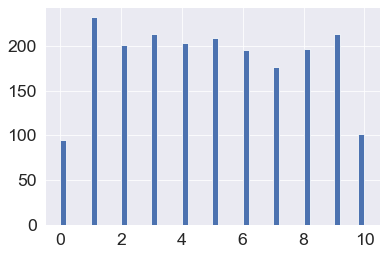

In [97]:
plt.hist(data.loc[data['Exited'] == 1, 'Tenure'].values, bins=50)
plt.show()

In [75]:
cols = ['CreditScore', 'Age', 'Tenure', 'Balance']


mms = Pipeline(steps=[
        ('minmax', MinMaxScaler())])


ss = Pipeline(steps=[
        ('standard', StandardScaler())])

# # StandardScaler
# preprocessor_ss = ColumnTransformer(
#         remainder='passthrough', #passthough features not listed
#         transformers=[
#             ('ss', ss , cols_scale)
#         ])


# use tenure!

#### StandardScaler

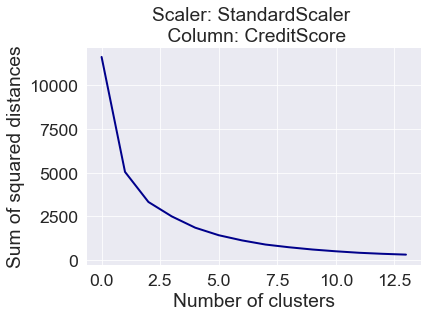

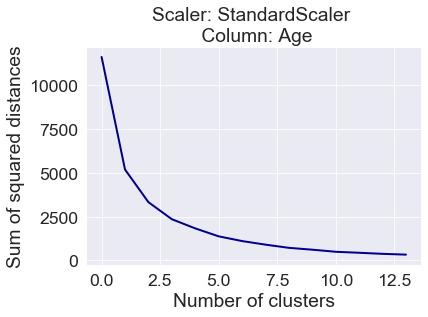

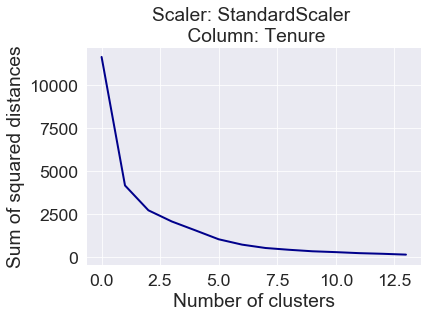

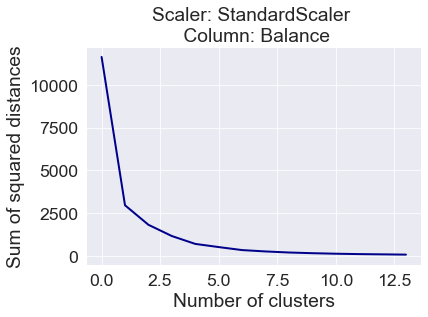

In [80]:
scaler = ss
scaler_string = 'StandardScaler'

for col in cols:
    Sum_of_squared_distances = []
    df = data[[col, 'Exited']]
    df['scaled'] = scaler.fit_transform(df[col].values.reshape(-1,1))
    df = df[['scaled', 'Exited']]
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k) 
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)

    sns.set_context("paper", font_scale = 2)
    plt.title(f"Scaler: {scaler_string} \n Column: {col}")
    plt.plot(Sum_of_squared_distances, linewidth=2.0, c='darkblue')
    plt.ylabel('Sum of squared distances')
    plt.xlabel('Number of clusters')
    plt.show()

#### MinMaxScaler

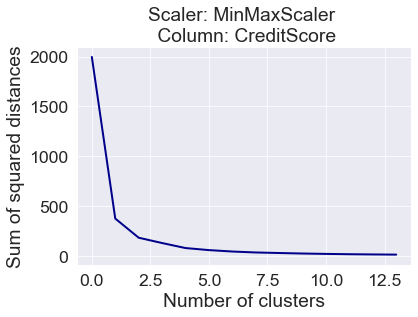

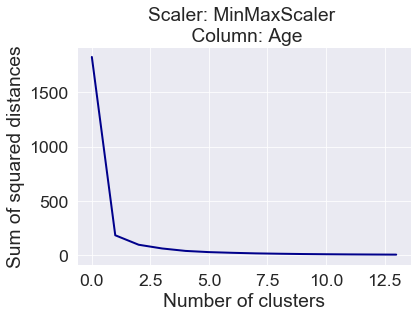

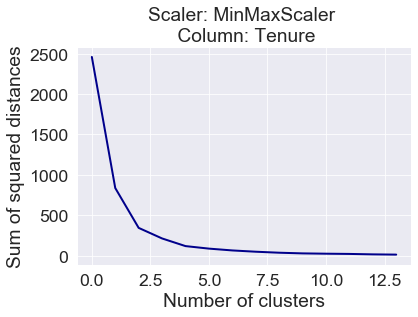

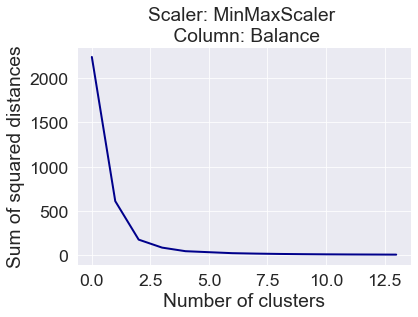

In [81]:
scaler = mms
scaler_string = 'MinMaxScaler'

for col in cols:
    Sum_of_squared_distances = []
    df = data[[col, 'Exited']]
    df['scaled'] = scaler.fit_transform(df[col].values.reshape(-1,1))
    df = df[['scaled', 'Exited']]
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k) 
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)

    sns.set_context("paper", font_scale = 2)
    plt.title(f"Scaler: {scaler_string} \n Column: {col}")
    plt.plot(Sum_of_squared_distances, linewidth=2.0, c='darkblue')
    plt.ylabel('Sum of squared distances')
    plt.xlabel('Number of clusters')
    plt.show()

In [25]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    # make pipeline (scaling) for this KMeans
    km = Pipeline(steps = [('preprocessor', preprocessor_ss), ('km', km)])
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
Sum_of_squared_distances

ValueError: could not convert string to float: 'Walker'